In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 100% !important; }</style>"))
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 22, 7

In [2]:
import pandas as pd 
from fbprophet import Prophet 

In [3]:
df = pd.read_csv('./dataset.csv')
df

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000000
1,2012018,2667437,QLD_CW_ST0203,2687.531000
2,3012018,2667437,QLD_CW_ST0203,2793.000000
3,4012018,2667437,QLD_CW_ST0203,2394.000000
4,5012018,2667437,QLD_CW_ST0203,2660.000000
...,...,...,...,...
1075,12122020,2667437,QLD_CW_ST0203,3167.594500
1076,13122020,2667437,QLD_CW_ST0203,3167.594500
1077,14122020,2667437,QLD_CW_ST0203,3383.354511
1078,15122020,2667437,QLD_CW_ST0203,2714.591329


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time Date,1080.0,1.567207e+07,8.791548e+06,1.012018e+06,8.069518e+06,15567019.0,2.308452e+07,3.112202e+07
Product,1080.0,2.667437e+06,0.000000e+00,2.667437e+06,2.667437e+06,2667437.0,2.667437e+06,2.667437e+06
Value,1080.0,4.048117e+03,1.439946e+03,2.042813e+03,2.632499e+03,4256.0,5.288249e+03,8.147740e+03


In [5]:
print(df.Product.unique())
print(df.Store.unique())

[2667437]
['QLD_CW_ST0203']


In [6]:
df.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

In [7]:
df ['Year'] = df['Time Date'].apply(lambda x : str(x)[-4:])
df ['Month'] = df['Time Date'].apply(lambda x : str(x)[-6:-4])
df ['Day'] = df['Time Date'].apply(lambda x : str(x)[:-6])
df ['ds'] = pd.DatetimeIndex(df['Year'] + '-' + df['Month'] + '-' + df['Day'])
df

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531000,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000000,2018,01,5,2018-01-05
...,...,...,...,...,...,...,...,...
1075,12122020,2667437,QLD_CW_ST0203,3167.594500,2020,12,12,2020-12-12
1076,13122020,2667437,QLD_CW_ST0203,3167.594500,2020,12,13,2020-12-13
1077,14122020,2667437,QLD_CW_ST0203,3383.354511,2020,12,14,2020-12-14
1078,15122020,2667437,QLD_CW_ST0203,2714.591329,2020,12,15,2020-12-15


In [8]:
df.dtypes

Time Date             int64
Product               int64
Store                object
Value               float64
Year                 object
Month                object
Day                  object
ds           datetime64[ns]
dtype: object

In [9]:
df.drop(columns=['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], inplace=True)
df.columns = ['y', 'ds']
df

,y,ds
0,2926.000000,2018-01-01
1,2687.531000,2018-01-02
2,2793.000000,2018-01-03
3,2394.000000,2018-01-04
4,2660.000000,2018-01-05
...,...,...
1075,3167.594500,2020-12-12
1076,3167.594500,2020-12-13
1077,3383.354511,2020-12-14
1078,2714.591329,2020-12-15


In [10]:
df.set_index(['ds'], inplace=True)
df

,y
ds,
2018-01-01,2926.000000
2018-01-02,2687.531000
2018-01-03,2793.000000
2018-01-04,2394.000000
2018-01-05,2660.000000
...,...
2020-12-12,3167.594500
2020-12-13,3167.594500
2020-12-14,3383.354511


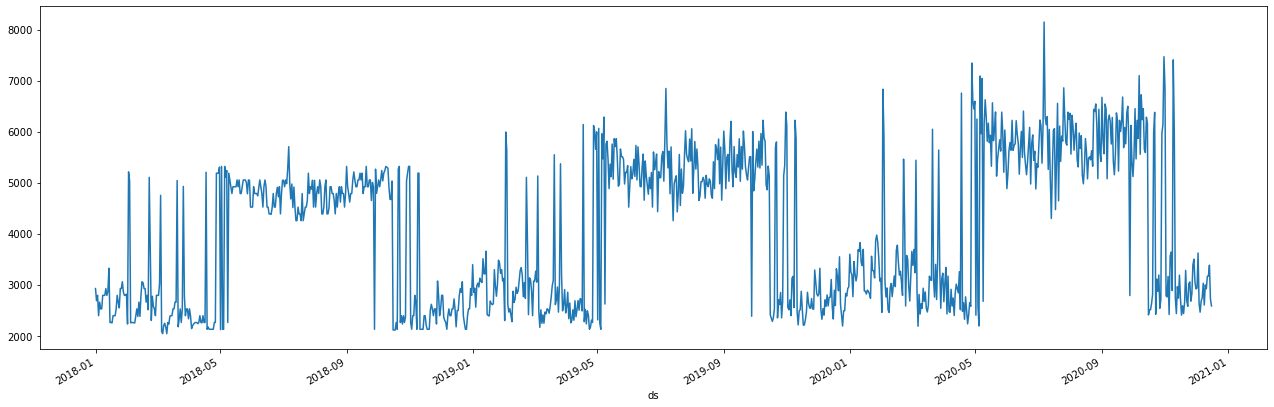

In [11]:
df.y.plot();

In [13]:
#Model Training
df = df.reset_index()
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

In [14]:
#Making Predictions
future = m.make_future_dataframe(periods=100, freq='D')
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3041.489276,787.189004,3928.107863,3041.489276,3041.489276,-641.915345,-641.915345,-641.915345,467.724032,...,16.611941,16.611941,16.611941,-1126.251318,-1126.251318,-1126.251318,0.0,0.0,0.0,2399.573931
1,2018-01-02,3042.246698,847.794175,4156.777521,3042.246698,3042.246698,-652.029690,-652.029690,-652.029690,467.724032,...,-11.285067,-11.285067,-11.285067,-1108.468655,-1108.468655,-1108.468655,0.0,0.0,0.0,2390.217008
2,2018-01-03,3043.004119,908.293549,4029.517690,3043.004119,3043.004119,-626.188801,-626.188801,-626.188801,467.724032,...,-4.407267,-4.407267,-4.407267,-1089.505566,-1089.505566,-1089.505566,0.0,0.0,0.0,2416.815318
3,2018-01-04,3043.761541,861.194766,4043.011138,3043.761541,3043.761541,-579.252371,-579.252371,-579.252371,467.724032,...,22.462032,22.462032,22.462032,-1069.438435,-1069.438435,-1069.438435,0.0,0.0,0.0,2464.509170
4,2018-01-05,3044.518962,861.498266,4155.182841,3044.518962,3044.518962,-615.260367,-615.260367,-615.260367,467.724032,...,-34.588120,-34.588120,-34.588120,-1048.396280,-1048.396280,-1048.396280,0.0,0.0,0.0,2429.258595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,2021-03-22,4240.642325,2085.127885,5303.175006,4237.473768,4243.868349,-514.955476,-514.955476,-514.955476,467.724032,...,16.611941,16.611941,16.611941,-999.291449,-999.291449,-999.291449,0.0,0.0,0.0,3725.686849
1176,2021-03-23,4241.721263,2114.488192,5329.114126,4238.513933,4244.999524,-532.411629,-532.411629,-532.411629,467.724032,...,-11.285067,-11.285067,-11.285067,-988.850594,-988.850594,-988.850594,0.0,0.0,0.0,3709.309634
1177,2021-03-24,4242.800202,2148.951103,5334.652039,4239.554098,4246.130345,-517.870965,-517.870965,-517.870965,467.724032,...,-4.407267,-4.407267,-4.407267,-981.187730,-981.187730,-981.187730,0.0,0.0,0.0,3724.929237
1178,2021-03-25,4243.879140,2118.003388,5325.758691,4240.594263,4247.245502,-486.699803,-486.699803,-486.699803,467.724032,...,22.462032,22.462032,22.462032,-976.885867,-976.885867,-976.885867,0.0,0.0,0.0,3757.179337


In [15]:
df.tail()

,ds,y
1075,2020-12-12,3167.594500
1076,2020-12-13,3167.594500
1077,2020-12-14,3383.354511
1078,2020-12-15,2714.591329
1079,2020-12-16,2585.035107


In [16]:
forecast[['ds', 'yhat']].tail()

,ds,yhat
1175,2021-03-22,3725.686849
1176,2021-03-23,3709.309634
1177,2021-03-24,3724.929237
1178,2021-03-25,3757.179337
1179,2021-03-26,3701.650936


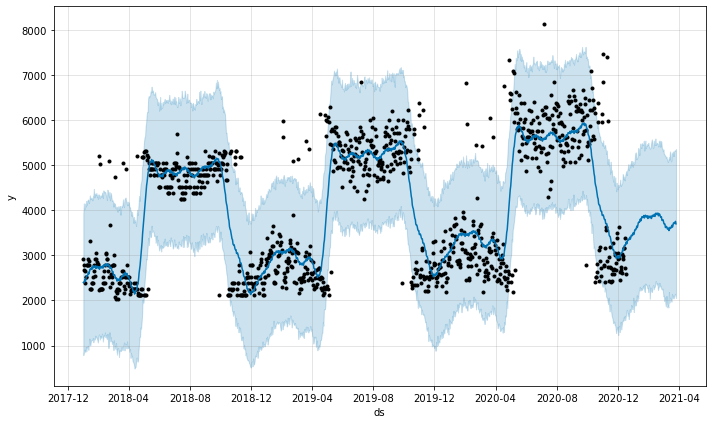

In [17]:
plot1 = m.plot(forecast)

In [19]:
forecast_100days = forecast[forecast['ds'] > '2020-12-16']
forecast_100days = forecast_100days[['ds', 'yhat']]
forecast_100days

,ds,yhat
1080,2020-12-17,3297.877119
1081,2020-12-18,3259.380726
1082,2020-12-19,3297.198904
1083,2020-12-20,3352.357732
1084,2020-12-21,3358.664707
...,...,...
1175,2021-03-22,3725.686849
1176,2021-03-23,3709.309634
1177,2021-03-24,3724.929237
1178,2021-03-25,3757.179337


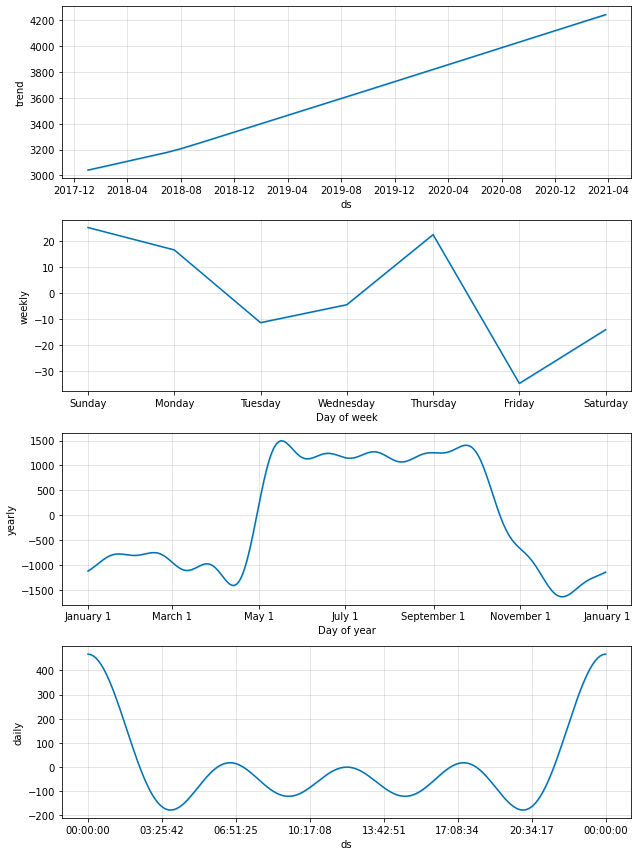

In [21]:
plot2 = m.plot_components(forecast)

In [23]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'daily',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}